# Movie Analysis - Movielens 🕵️‍♀️

Neste notebook irei fazer uma analise exploratoria em alguns filmes do movielens

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
# troquei o nome das variaveis
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


A base de dados até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações.

Agora vou analisar um pouco melhor o dataset de avaliações.

In [ ]:
avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
#tambem irei alterar o nome das variaveis
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Analisando os gêneros

vou separar os gêneros de cada filme e analisar quantos filmes tem o respectivo gênero

In [ ]:
# separando os generos para classifica-los

filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

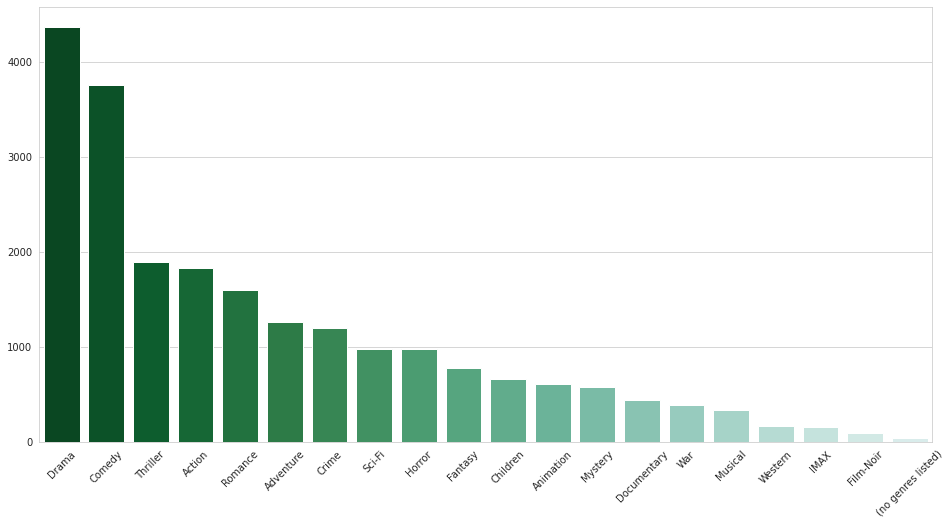

In [ ]:
# mostrando em um grafico
sns.set_style("whitegrid")
filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
plt.xticks(rotation=45)
plt.show()

## A media é um dado importante a ser analisado

agora vou adicionar a media de avalições na tabela

In [ ]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")

#substituindo o nome 'nome' por 'media'
filmes_com_media = filmes_com_media.rename(columns={'nota': 'media'})
filmes_com_media.head()

,filmeId,titulo,generos,media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [ ]:
# entretanto existem filmes que nao foram avaliados, quais sao eles?
filmes_com_media[filmes_com_media["media"].isnull()]

,filmeId,titulo,generos,media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Checando a qualidade do meu dado

preciso saber se posso confiar apenas na média como uma medida que me garanta que o filme foi realmente bem avaliado 

In [ ]:
# Calculei a Média, Variância e Quantidade dos Votos, arredondando duas casas decimais
notas_medianas_medias_por_filme = avaliacoes.groupby('filmeId')['nota'].aggregate(['mean','var','count']).round(2)

# ordenei os filmes com maiores medias
filmes_maiores_medias = notas_medianas_medias_por_filme.sort_values(['mean'], ascending=False)

filmes_maiores_medias.head()
#notas_medianas_medias_por_filme.sort_values(['count'], ascending=True).head(5)

,mean,var,count
filmeId,,,
69860,5.0,NaN,1
145994,5.0,NaN,1
141816,5.0,NaN,1
26366,5.0,NaN,1
95311,5.0,NaN,1


Tive a curiosidade de checar quantas pessoas avaliaram as maiores médias e minhas suspeitas foram confirmadas, apenas uma pessoa avaliou e deu nota máxima. Logo, preciso levar em consideração outros fatores na hora de analisar as avaliações. <br/>
Pude perceber que a classificacao nao é confiavel, uma vez que depende do numero de pessoas que avaliam. Entao preciso adicionar na tabela tambem o numero de avaliacoes de cada filme

In [ ]:
notas_medias_count_por_filme = avaliacoes.groupby("filmeId")["nota"].aggregate(['count','mean'])
filmes_com_media_count = filmes.join(notas_medias_count_por_filme, on="filmeId")
filmes_com_media_count.columns = ["filmeId", "titulo", "generos", "n_avaliacoes", "media"]
filmes_com_media_count.sort_values("media", ascending=False).head(10)

,filmeId,titulo,generos,n_avaliacoes,media
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
9094,143511,Human (2015),Documentary,1.0,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
4251,6201,Lady Jane (1986),Drama|Romance,1.0,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0
9122,145994,Formula of Love (1984),Comedy,1.0,5.0


# Visualizando as avaliações amplamente

levando a media, a mediana e os outliers em consideração vou gerar os gráficos para os 10 filmes mais votados
<br/>
<br/>
## 🔍 Explorando distribuições
extrair alguns filmes com médias semelhantes e ver o quão diferentes são as suas distribuições

,mean,var,count
filmeId,,,
1178,4.54,0.29,12
1104,4.47,0.43,20
2360,4.46,0.34,12
318,4.43,0.51,317
1217,4.43,0.32,15


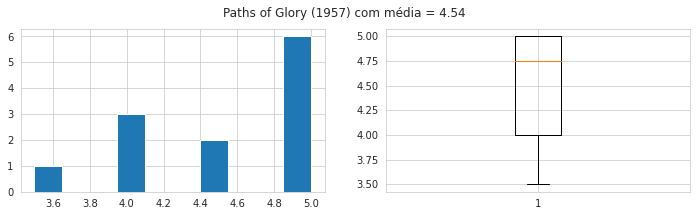

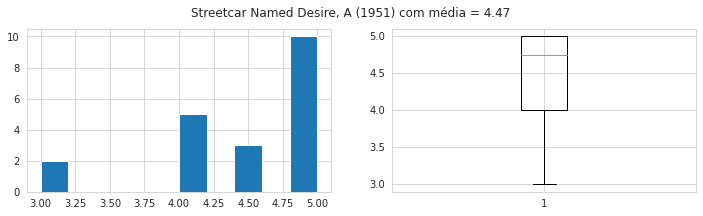

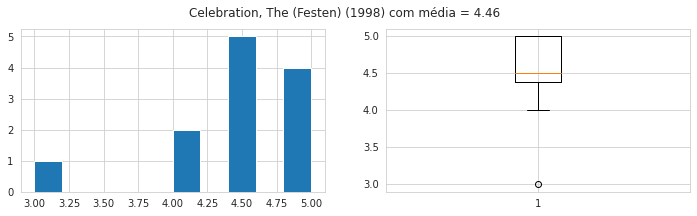

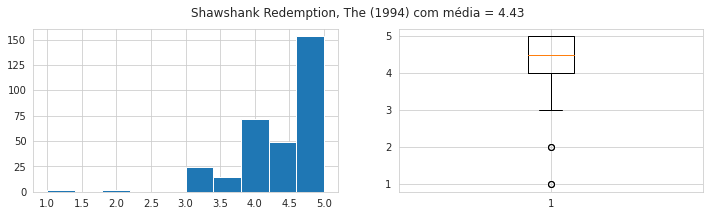

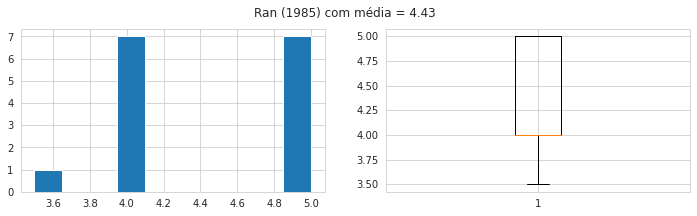

In [ ]:
def plot_2_filmes(complemento_titulo, filme_id):
  # Busco o nome do dataframe filmes
  filme_name = filmes.query(f"filmeId=={filme_id}")['titulo'].values[0]
  # Criei o Titulo 
  titulo = filme_name + complemento_titulo
  # Busco as avalições
  notas_do_filme = avaliacoes.query(f"filmeId=={filme_id}")["nota"]
  # Ploto o Gráfico 
  plt.figure(figsize=(12, 3))
  # subplot utilizado para colocar mais de um gráfico na mesma linha
  plt.subplot(121)
  plt.hist(notas_do_filme)
  plt.subplot(122)
  plt.boxplot(notas_do_filme)
  plt.suptitle(titulo)
  plt.show()

# Selecionei os 2000 mais votados
filmes_mais_votados = notas_medianas_medias_por_filme.sort_values(['count'], ascending=False).head(2000)
# Ordenei por Variância e Média e selecionei os 5 primeiros
filmes_selecionados = filmes_mais_votados.sort_values(['mean','var'], ascending=False).head()
display((filmes_selecionados))
# Para cada filme selecionado gero um gráfico
for index, row in filmes_selecionados.iterrows():
  # Criei o complemento para Titulo 
  complemento_titulo = " com média = "+ str(row['mean'])
  # Utilizo a função plot_filme_2_o_retorno para gerar o gráfico
  plot_2_filmes(complemento_titulo, index)

## 💭 Analisando

Criei um boxplot dos 10 filmes com mais votos

,votos,titulo
filmeId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
260,251,Star Wars: Episode IV - A New Hope (1977)
480,238,Jurassic Park (1993)
110,237,Braveheart (1995)
589,224,Terminator 2: Judgment Day (1991)


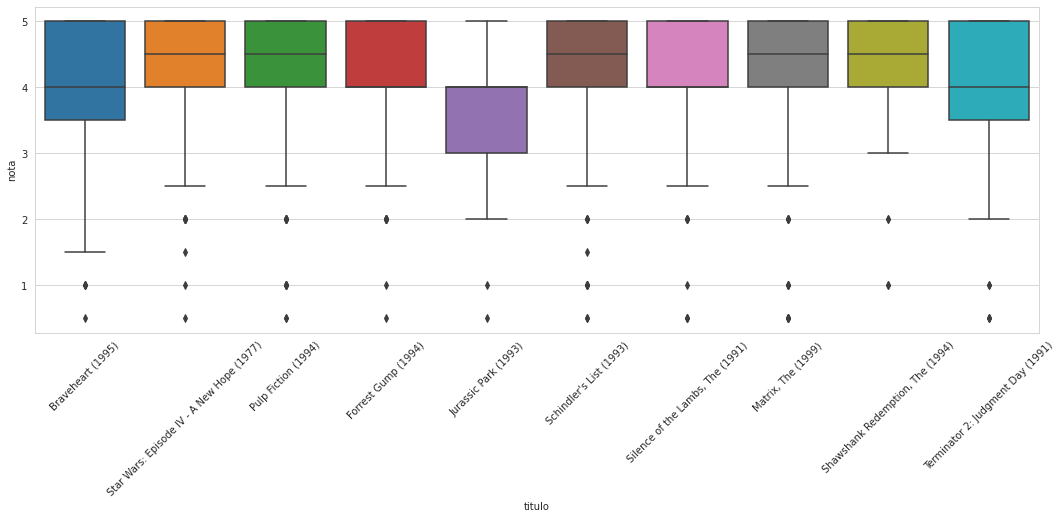

In [ ]:
# Transformei o filmeId em índice no dataframe filmes
filmes_titulo = filmes.set_index('filmeId')
# Juntei filmes_titulo + avaliacoes
filmes_avalicoes_titulo = avaliacoes.join(filmes_titulo['titulo'], on="filmeId")
# Gerei uma lista dos mais votados
filmes_mais_votados = avaliacoes.groupby('filmeId')['nota'].aggregate(['count']).sort_values('count',ascending=False).head(10)
# Rotulei os mais votados
filmes_mais_votados_titulo = filmes_mais_votados.join(filmes_titulo['titulo'], on="filmeId").rename(columns={"count" : "votos"})
display(filmes_mais_votados_titulo)
# Realizei a query com filmes mais votados
filmes_mais_votados_titulo = filmes_avalicoes_titulo.query(f"filmeId in {filmes_mais_votados_titulo.index.tolist()}")
# Plotei o Gráfico
plt.figure(figsize=(18,6))
plt.xticks(rotation=45)
sns.boxplot(data = filmes_mais_votados_titulo, x=filmes_mais_votados_titulo['titulo'],  y="nota")
plt.show()

### ⭐ Conclusões

- Todos os filmes os receberam nota máxima.
- Todos filmes possuem nota baixa (outliers).
- Excluindo os outliers o Braveheart foi unico com nota menor que 2.
Shawshank Redemption é o segundo filme mais votado, possui as menores notas, ou seja, é o filme melhor avalisado.
- Jurrasic Park, com as menores notas pode ser considerado o pior filme dos selecionados.

# 👀 Notas médias por ano 

Gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).


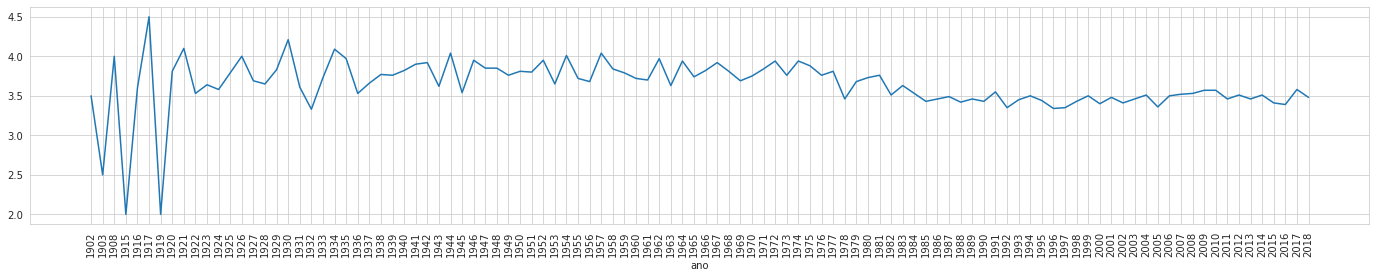

In [ ]:
# extrai com extract o ano buscando no campo titulo (AAAA
filmes_avalicoes_titulo['ano'] = filmes_avalicoes_titulo["titulo"].str.extract(r'\s\((\d{4})')
# removi titulos sem Ano 
filmes_avalicoes_titulo_semvazio = filmes_avalicoes_titulo.dropna(subset=['ano'])
# Calculei a Média por ano
notas_medias_ano = filmes_avalicoes_titulo_semvazio.groupby('ano')['nota'].mean().round(2)
# Calculei a Numero de elementos
filmes_por_ano = filmes_avalicoes_titulo_semvazio['ano'].unique()
# Plotei o mesmo grafico do desafio1
plt.figure(figsize=(24,4))
sns.lineplot(x=notas_medias_ano.index,
            y=notas_medias_ano.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_ano) + 30))
plt.xticks(rotation=90)
plt.show()